In [1]:
import pandas as pd
import json

In [2]:
# Read the data
file = '8LJ3Q3Fsrzs_ts.json'
with open(file) as f:
    data = json.load(f)
print(data)

{'Deadlift': [[140.21499999999997, 156.55]], 'Pull-up': [[189.48999999999998, 206.68], [265.27, 271.78]], 'Seated Row': [[298.27757142857143, 311.8], [315.13, 334.87]], 'Lat Pulldown': [[343.26916666666665, 358.63], [356.199, 368.08]], 'Scapular Pull-ups': [[469.6457142857143, 483.24], [481.93333333333334, 492.54]]}


In [3]:
table = pd.DataFrame(columns=['Exercise', 'Golden Label Video', 'Golden Label Text', 'ChatGPT-Citation', 'Final Timestamp', 'Overlap(Golden/ChatGPT-Citation)', 'Overlap(Golden/Final Timestamp)', 'Overlap(ChatGPT-Citation/Final Timestamp)'])
table

,Exercise,Golden Label Video,Golden Label Text,ChatGPT-Citation,Final Timestamp,Overlap(Golden/ChatGPT-Citation),Overlap(Golden/Final Timestamp),Overlap(ChatGPT-Citation/Final Timestamp)


In [4]:
for ex, times in data.items():
    df_exercise = pd.DataFrame([{'Exercise': ex, 'Final Timestamp': times}])
    table = pd.concat([table, df_exercise], ignore_index=True)
table

,Exercise,Golden Label Video,Golden Label Text,ChatGPT-Citation,Final Timestamp,Overlap(Golden/ChatGPT-Citation),Overlap(Golden/Final Timestamp),Overlap(ChatGPT-Citation/Final Timestamp)
0,Deadlift,NaN,NaN,NaN,"[[140.21499999999997, 156.55]]",NaN,NaN,NaN
1,Pull-up,NaN,NaN,NaN,"[[189.48999999999998, 206.68], [265.27, 271.78]]",NaN,NaN,NaN
2,Seated Row,NaN,NaN,NaN,"[[298.27757142857143, 311.8], [315.13, 334.87]]",NaN,NaN,NaN
3,Lat Pulldown,NaN,NaN,NaN,"[[343.26916666666665, 358.63], [356.199, 368.08]]",NaN,NaN,NaN
4,Scapular Pull-ups,NaN,NaN,NaN,"[[469.6457142857143, 483.24], [481.93333333333...",NaN,NaN,NaN


In [5]:
# Unmentioned, but shown exercises
table.loc[-1] = {'Exercise':'Chin-Ups', 'Golden Label Video':[[253.5,265.5]], 'ChatGPT-Citation':[[]], 'Final Timestamp':[[]]}  # adding a row
table.index = table.index + 1  # shifting index
table.sort_index(inplace=True)
table.iloc[0], table.iloc[1] = table.iloc[1], table.iloc[0].copy()
table.iloc[1], table.iloc[2] = table.iloc[2], table.iloc[1].copy()

table.loc[-1] = {'Exercise':'Chest-Supported Rows', 'Golden Label Video':[[311.0,315.5],[318.75,328.5],[338.0,339.75]], 'ChatGPT-Citation':[[]], 'Final Timestamp':[[]]}  # adding a row
table.index = table.index + 1  # shifting index
table.sort_index(inplace=True)
table.iloc[0], table.iloc[1] = table.iloc[1], table.iloc[0].copy()
table.iloc[1], table.iloc[2] = table.iloc[2], table.iloc[1].copy()
table.iloc[2], table.iloc[3] = table.iloc[3], table.iloc[2].copy()
table.iloc[3], table.iloc[4] = table.iloc[4], table.iloc[3].copy()
table

,Exercise,Golden Label Video,Golden Label Text,ChatGPT-Citation,Final Timestamp,Overlap(Golden/ChatGPT-Citation),Overlap(Golden/Final Timestamp),Overlap(ChatGPT-Citation/Final Timestamp)
0,Deadlift,NaN,NaN,NaN,"[[140.21499999999997, 156.55]]",NaN,NaN,NaN
1,Pull-up,NaN,NaN,NaN,"[[189.48999999999998, 206.68], [265.27, 271.78]]",NaN,NaN,NaN
2,Chin-Ups,"[[253.5, 265.5]]",NaN,[[]],[[]],NaN,NaN,NaN
3,Seated Row,NaN,NaN,NaN,"[[298.27757142857143, 311.8], [315.13, 334.87]]",NaN,NaN,NaN
4,Chest-Supported Rows,"[[311.0, 315.5], [318.75, 328.5], [338.0, 339....",NaN,[[]],[[]],NaN,NaN,NaN
5,Lat Pulldown,NaN,NaN,NaN,"[[343.26916666666665, 358.63], [356.199, 368.08]]",NaN,NaN,NaN
6,Scapular Pull-ups,NaN,NaN,NaN,"[[469.6457142857143, 483.24], [481.93333333333...",NaN,NaN,NaN


In [6]:
# Golden Label Video
# Deadlift
table.at[0, 'Golden Label Video'] = [[139.25,146.0],[161.5,163.75],[170.0,188.5]]
# Pull-Ups
table.at[1, 'Golden Label Video'] = [[67.0,78.5],[190.25,195.0],[208.0,210.0],[221.25,223.25],[253.5,277.0],[279.0,284.0],[285.0,288.0],[289.0,293.25]]
# Chin-Ups
#table.at[2, 'Golden Label Video'] = []
# Seated Rows
table.at[3, 'Golden Label Video'] = [[106.5,108.0],[116.0,120.5],[130.5,137.5]]
# Lat Pulldowns
table.at[5, 'Golden Label Video'] = [[78.5,82.0],[86.5,92.0],[341.5,359.5],[400.5,403.25],[458.5,467.0]]
# Scapular Pull-Ups
table.at[6, 'Golden Label Video'] = [[468.75,472.0],[480.0,496.25]]
table
#Done

,Exercise,Golden Label Video,Golden Label Text,ChatGPT-Citation,Final Timestamp,Overlap(Golden/ChatGPT-Citation),Overlap(Golden/Final Timestamp),Overlap(ChatGPT-Citation/Final Timestamp)
0,Deadlift,"[[139.25, 146.0], [161.5, 163.75], [170.0, 188...",NaN,NaN,"[[140.21499999999997, 156.55]]",NaN,NaN,NaN
1,Pull-up,"[[67.0, 78.5], [190.25, 195.0], [208.0, 210.0]...",NaN,NaN,"[[189.48999999999998, 206.68], [265.27, 271.78]]",NaN,NaN,NaN
2,Chin-Ups,"[[253.5, 265.5]]",NaN,[[]],[[]],NaN,NaN,NaN
3,Seated Row,"[[106.5, 108.0], [116.0, 120.5], [130.5, 137.5]]",NaN,NaN,"[[298.27757142857143, 311.8], [315.13, 334.87]]",NaN,NaN,NaN
4,Chest-Supported Rows,"[[311.0, 315.5], [318.75, 328.5], [338.0, 339....",NaN,[[]],[[]],NaN,NaN,NaN
5,Lat Pulldown,"[[78.5, 82.0], [86.5, 92.0], [341.5, 359.5], [...",NaN,NaN,"[[343.26916666666665, 358.63], [356.199, 368.08]]",NaN,NaN,NaN
6,Scapular Pull-ups,"[[468.75, 472.0], [480.0, 496.25]]",NaN,NaN,"[[469.6457142857143, 483.24], [481.93333333333...",NaN,NaN,NaN


In [7]:
# Golden Label Text
table.at[0, 'Golden Label Text'] = [[139.0,188.0]]
table.at[1, 'Golden Label Text'] = [[190.0,293.5]]
table.at[2, 'Golden Label Text'] = [[224.0,265.0]]
table.at[4, 'Golden Label Text'] = [[319.5,340.0]]
table.at[5, 'Golden Label Text'] = [[341.5,467.0]]
table.at[6, 'Golden Label Text'] = [[468.5,498.5]]
table
#Done

,Exercise,Golden Label Video,Golden Label Text,ChatGPT-Citation,Final Timestamp,Overlap(Golden/ChatGPT-Citation),Overlap(Golden/Final Timestamp),Overlap(ChatGPT-Citation/Final Timestamp)
0,Deadlift,"[[139.25, 146.0], [161.5, 163.75], [170.0, 188...","[[139.0, 188.0]]",NaN,"[[140.21499999999997, 156.55]]",NaN,NaN,NaN
1,Pull-up,"[[67.0, 78.5], [190.25, 195.0], [208.0, 210.0]...","[[190.0, 293.5]]",NaN,"[[189.48999999999998, 206.68], [265.27, 271.78]]",NaN,NaN,NaN
2,Chin-Ups,"[[253.5, 265.5]]","[[224.0, 265.0]]",[[]],[[]],NaN,NaN,NaN
3,Seated Row,"[[106.5, 108.0], [116.0, 120.5], [130.5, 137.5]]",NaN,NaN,"[[298.27757142857143, 311.8], [315.13, 334.87]]",NaN,NaN,NaN
4,Chest-Supported Rows,"[[311.0, 315.5], [318.75, 328.5], [338.0, 339....","[[319.5, 340.0]]",[[]],[[]],NaN,NaN,NaN
5,Lat Pulldown,"[[78.5, 82.0], [86.5, 92.0], [341.5, 359.5], [...","[[341.5, 467.0]]",NaN,"[[343.26916666666665, 358.63], [356.199, 368.08]]",NaN,NaN,NaN
6,Scapular Pull-ups,"[[468.75, 472.0], [480.0, 496.25]]","[[468.5, 498.5]]",NaN,"[[469.6457142857143, 483.24], [481.93333333333...",NaN,NaN,NaN


In [8]:
# Golden Label ChatGPT-Citation
table.at[0, 'ChatGPT-Citation'] = [[139.0,153.0]]
table.at[1, 'ChatGPT-Citation'] = [[190.0,215.75],[265.25,270.0]]
table.at[3, 'ChatGPT-Citation'] = [[298.50,310.0],[315.0,332.0]]
table.at[5, 'ChatGPT-Citation'] = [[341.0,356.5],[356.5,366.0]]
table.at[6, 'ChatGPT-Citation'] = [[468.5,480.0],[480.0,488]]
table
#Done
#Todo: Push-Up Variation Golden Label Video
# Erklärung: Warum startet Final Timestamp später als Golden Label Text?

,Exercise,Golden Label Video,Golden Label Text,ChatGPT-Citation,Final Timestamp,Overlap(Golden/ChatGPT-Citation),Overlap(Golden/Final Timestamp),Overlap(ChatGPT-Citation/Final Timestamp)
0,Deadlift,"[[139.25, 146.0], [161.5, 163.75], [170.0, 188...","[[139.0, 188.0]]","[[139.0, 153.0]]","[[140.21499999999997, 156.55]]",NaN,NaN,NaN
1,Pull-up,"[[67.0, 78.5], [190.25, 195.0], [208.0, 210.0]...","[[190.0, 293.5]]","[[190.0, 215.75], [265.25, 270.0]]","[[189.48999999999998, 206.68], [265.27, 271.78]]",NaN,NaN,NaN
2,Chin-Ups,"[[253.5, 265.5]]","[[224.0, 265.0]]",[[]],[[]],NaN,NaN,NaN
3,Seated Row,"[[106.5, 108.0], [116.0, 120.5], [130.5, 137.5]]",NaN,"[[298.5, 310.0], [315.0, 332.0]]","[[298.27757142857143, 311.8], [315.13, 334.87]]",NaN,NaN,NaN
4,Chest-Supported Rows,"[[311.0, 315.5], [318.75, 328.5], [338.0, 339....","[[319.5, 340.0]]",[[]],[[]],NaN,NaN,NaN
5,Lat Pulldown,"[[78.5, 82.0], [86.5, 92.0], [341.5, 359.5], [...","[[341.5, 467.0]]","[[341.0, 356.5], [356.5, 366.0]]","[[343.26916666666665, 358.63], [356.199, 368.08]]",NaN,NaN,NaN
6,Scapular Pull-ups,"[[468.75, 472.0], [480.0, 496.25]]","[[468.5, 498.5]]","[[468.5, 480.0], [480.0, 488]]","[[469.6457142857143, 483.24], [481.93333333333...",NaN,NaN,NaN


In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.parasite_axes import SubplotHost

def plot_my_figure(figure, df_column, color, row, cell_inner, row_offset):
    plt.plot(table.at[row, df_column][cell_inner], [-row_offset,-row_offset], color=color)



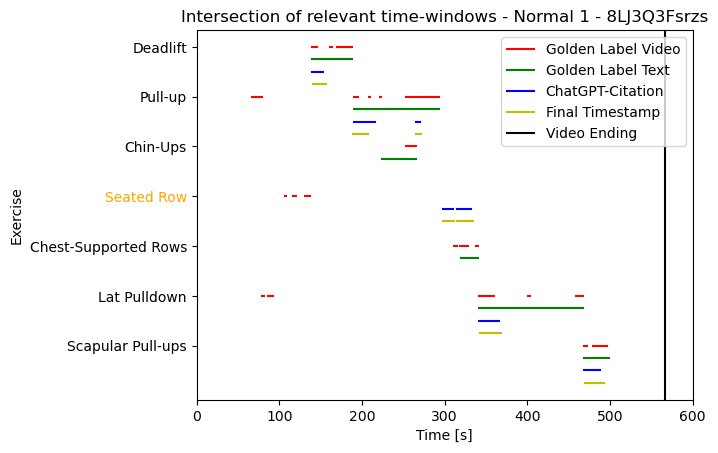

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.parasite_axes import SubplotHost
from matplotlib.legend_handler import HandlerTuple

fig1, ax1 = plt.subplots(1)
plt.xlabel('Time [s]')
plt.ylabel('Exercise')
plt.xlim(0, 600)
plt.title("Intersection of relevant time-windows - Normal 1 - 8LJ3Q3Fsrzs")
# video ending
plt.plot([],[], 'r', label='Golden Label Video')
plt.plot([],[], 'g', label='Golden Label Text')
plt.plot([],[], 'b', label='ChatGPT-Citation')
plt.plot([],[], 'y', label='Final Timestamp')
plt.axvline(x = 567.00, color = 'k', label = 'Video Ending')

columns = ['Golden Label Video', 'Golden Label Text', 'ChatGPT-Citation', 'Final Timestamp']
colors = ['r', 'g', 'b', 'y']

ax1.set_yticks([0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0])
#plt.gca().get_yticklabels()[2].set_color('orange') # Unrecognized, becuase of missing detailed explanation, but video-material shown
plt.gca().get_yticklabels()[3].set_color('orange') # Chest Supported Rows instead of Seated Rows
ax1.set_yticklabels(table["Exercise"].tolist())

for i in range(len(table)):
    row_offset = i + 0.0
    for col, color in zip(columns, colors):
        if table.at[i,col] and isinstance(table.at[i,col], list):
            for j in range(len(table.at[i, col])):
                if table.at[i, col][j]:
                    plot_my_figure(fig1, col, color, i, j, row_offset)
            row_offset += 0.25
plt.legend(loc='best')
plt.savefig("C:\\Users\\maxim\\Dropbox\\Thesis\\Bilder\\Results\\01_8LJ3Q3Fsrzs.svg")
#8LJ3Q3Fsrzs

In [11]:
def resolve_nan(table: pd.DataFrame):
    """
    Takes a table and replaces all NaN with an empty list.
    """
    for col in table.columns:
        isnull = table[col].isnull()
        table.loc[isnull, [col]] = pd.Series([[[]]] * isnull.sum()).values

resolve_nan(table)
table

C:\Users\maxim\AppData\Local\Temp\ipykernel_23248\4106075898.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  table.loc[isnull, [col]] = pd.Series([[[]]] * isnull.sum()).values
C:\Users\maxim\AppData\Local\Temp\ipykernel_23248\4106075898.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  table.loc[isnull, [col]] = pd.Series([[[]]] * isnull.sum()).values
C:\Users\maxim\AppData\Local\Temp\ipykernel_23248\4106075898.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  table.loc[isnull, [col]] = pd.Series([[[]]] * isnull.sum()).values
C:\Users\maxim\AppData\Local\Temp\ipykernel_23248\4106075898.py:7: FutureWarning: The default dtype for empty

,Exercise,Golden Label Video,Golden Label Text,ChatGPT-Citation,Final Timestamp,Overlap(Golden/ChatGPT-Citation),Overlap(Golden/Final Timestamp),Overlap(ChatGPT-Citation/Final Timestamp)
0,Deadlift,"[[139.25, 146.0], [161.5, 163.75], [170.0, 188...","[[139.0, 188.0]]","[[139.0, 153.0]]","[[140.21499999999997, 156.55]]",[[]],[[]],[[]]
1,Pull-up,"[[67.0, 78.5], [190.25, 195.0], [208.0, 210.0]...","[[190.0, 293.5]]","[[190.0, 215.75], [265.25, 270.0]]","[[189.48999999999998, 206.68], [265.27, 271.78]]",[[]],[[]],[[]]
2,Chin-Ups,"[[253.5, 265.5]]","[[224.0, 265.0]]",[[]],[[]],[[]],[[]],[[]]
3,Seated Row,"[[106.5, 108.0], [116.0, 120.5], [130.5, 137.5]]",[[]],"[[298.5, 310.0], [315.0, 332.0]]","[[298.27757142857143, 311.8], [315.13, 334.87]]",[[]],[[]],[[]]
4,Chest-Supported Rows,"[[311.0, 315.5], [318.75, 328.5], [338.0, 339....","[[319.5, 340.0]]",[[]],[[]],[[]],[[]],[[]]
5,Lat Pulldown,"[[78.5, 82.0], [86.5, 92.0], [341.5, 359.5], [...","[[341.5, 467.0]]","[[341.0, 356.5], [356.5, 366.0]]","[[343.26916666666665, 358.63], [356.199, 368.08]]",[[]],[[]],[[]]
6,Scapular Pull-ups,"[[468.75, 472.0], [480.0, 496.25]]","[[468.5, 498.5]]","[[468.5, 480.0], [480.0, 488]]","[[469.6457142857143, 483.24], [481.93333333333...",[[]],[[]],[[]]


In [12]:
import numpy as np

def intersection_and_union(segment1, segment2):
    """Calculates the intersection and union of two segments if overlap occurs.
    Returns the intersecting segment and unioned segment of the two segments.
    If not intersection occurs, the unioned segmentsa re the original segments
    """
    intersecting_segment = []
    unioned_segment = []
    begin1, end1 = segment1
    begin2, end2 = segment2
    if (end2 >= begin1 and (begin2 <= begin1 <= end2)) or (end1 >= begin2 and (begin1 <= begin2 <= end1)):
        intersecting_segment = [max(begin1,begin2), min(end1, end2)]
        unioned_segment = [min(begin1,begin2), max(end1, end2)]
        #print("Intersecting segment: ",intersecting_segment)
        #print("Unioned segment: ",unioned_segment)
    else:
        #print("No overlap occured. Returning original segments as unioned segments")
        unioned_segment = [segment1, segment2]
    return intersecting_segment, unioned_segment

def unify_segmentlist(segmentlist):
    """Unifies a list of segments by merging overlapping segments."""
    # If /if / else for the calculation of the unioned segments
    segmentlist.sort()
    prev_begin = 0
    prev_end = 0
    unified_segmentlist = []
    for count, (begin, end) in enumerate(segmentlist):
        # initiate beseline segment
        if prev_begin == 0 and prev_end == 0:
            #print("Initializing prev_begin & prev_end with", begin, end)    
            prev_begin = begin
            prev_end = end
            if count == len(segmentlist)-1:
                #print("End of list reached, adding", prev_begin, prev_end, "to union")
                unified_segmentlist.append([prev_begin,prev_end])
            continue
        # Overlap occurs
        if intersection_and_union([prev_begin,prev_end], [begin,end])[0]:
            #print("Overlap is at:", intersection_and_union([prev_begin,prev_end], [begin,end])[0])
            #print("Overlap found:", prev_begin, prev_end, begin, end)
            prev_begin = min(prev_begin,begin)
            # difference amounts from begin of current segment (since they are sorted, begin of current > begin of previous) end min(end of current, end of previous)
            prev_end = max(prev_end, end)
            if count == len(segmentlist)-1:
                #print("End of list reached, adding", prev_begin, prev_end, "to union")
                unified_segmentlist.append([prev_begin,prev_end])
        else:
            #print("Adding to union:", prev_begin, prev_end)
            unified_segmentlist.append([prev_begin, prev_end])
            #print("New prev_begin & prev_end", begin, end)
            prev_begin = begin
            prev_end = end
            if count == len(segmentlist)-1:
                #print("End of list reached, adding", prev_begin, prev_end, "to union")
                unified_segmentlist.append([prev_begin,prev_end])
    return unified_segmentlist

def total_length(segmentlist):
    """
    Calculate the total length of a list of segments.
    """
    total_length = 0
    for begin, end in segmentlist:
        total_length += end - begin
    return total_length

def average_IoU(column1, column2,):
    """Calculates average and median Intersection over Union (IoU) & recall of two labels of a video by averaging/medianing the IoU/recall over all its exercises.
    Activate prints to get insight into dataflow."""
    iou_exercises = []
    recall_exercises = []
    for count, (label1_exercise, label2_exercise) in enumerate(zip(table[column1],table[column2])):
        iou_exercise = -1
        recall_exercise = -1
        #exercise = table.at[count, 'Exercise']
        #print("Current Exercise:",exercise)
        #print("Current Exercise Label 1:",label1_exercise)
        #print("Current Exercise Label 2:",label2_exercise)
        if not label1_exercise or not label1_exercise[0]:
            if not label2_exercise or not label2_exercise[0]:
                #print("No label 1 and 2. Nothing to add to IoU list.")
                #print()
                continue
            #print("No label 1")
            iou_exercise = 0
            recall_exercise = 0
            recall_exercises.append(recall_exercise)
            iou_exercises.append(iou_exercise)
            #print("IoU ", exercise, ": ", iou_exercise)
            #print()
            continue
        # Iterate through all segments of label1 of this exercise
        intersecting_segments__exercise = []
        unioned_segment_candidates = []
        for segment_label1 in label1_exercise:
            if not label2_exercise or not label2_exercise[0]:
                #print("No label 2")
                iou_exercise = 0
                #recall_exercise = 0
                iou_exercises.append(iou_exercise)
                continue
            for segment_label2 in label2_exercise:
                intersecting_time, unioned_time = intersection_and_union(segment_label1, segment_label2)
                intersecting_segments__exercise.append(intersecting_time)
                if type(unioned_time[0]) == float:
                    unioned_segment_candidates.append(unioned_time)
                elif type(unioned_time[0]) == list:
                    unioned_segment_candidates.append(unioned_time[0])
                    unioned_segment_candidates.append(unioned_time[1])
                else:
                    print("Error in unioned_time")
        #print("intersecting_times: ",intersecting_segments__exercise)
        #print("unioned_times: ", unioned_segment_candidates)
        
        distinct_unioned_segment_candidates = []
        for segment in unioned_segment_candidates:
            if segment not in distinct_unioned_segment_candidates:
                distinct_unioned_segment_candidates.append(segment)
        #print("Truncated unioned_times: ", distinct_unioned_segment_candidates)

        # Remove empty lists from intersecting_segments__exercise
        intersecting_segments__exercise = [x for x in intersecting_segments__exercise if x]
        intersecting_segments__exercise = unify_segmentlist(intersecting_segments__exercise)
        unioned_segments__exercise = unify_segmentlist(distinct_unioned_segment_candidates)
        
        #print("Intersected times: ", intersecting_segments__exercise)
        #print("Unioned times: ", unioned_segments__exercise)
        # Total time of both lists
        # IoU
        if iou_exercise != 0:
            iou_exercise = total_length(intersecting_segments__exercise)/total_length(unioned_segments__exercise)
            iou_exercises.append(iou_exercise)
        if recall_exercise != 0:
            recall_exercise = total_length(intersecting_segments__exercise)/total_length(label1_exercise)
            recall_exercises.append(recall_exercise)

        #print("IoU & recall", exercise, ": ", iou_exercise, recall_exercise)
        #print()
    # Return list of exercise IoUs as well as the average IoU as well as the median IoU
    if len(iou_exercises) == 0:
        return 0, 0, 0, 0 # average IoU, median IoU, average recall, median recall
    return sum(iou_exercises)/len(iou_exercises), np.median(iou_exercises), sum(recall_exercises)/len(recall_exercises), np.median(recall_exercises)
                     


print("Performance of premise-hypothesis: ", average_IoU('Golden Label Video', 'Golden Label Text'))
print("Identify relevant subtitles: ", average_IoU('Golden Label Text', 'ChatGPT-Citation'))
print("Track down timestamps: ", average_IoU('ChatGPT-Citation', 'Final Timestamp'))
print("Framework's overall performance at detecting video: ", average_IoU('Golden Label Video', 'Final Timestamp'))

Performance of premise-hypothesis:  (0.2771630386714515, 0.27710843373493976, 0.7387678935210448, 0.7946428571428571)
Identify relevant subtitles:  (0.20354924578527062, 0.19444444444444445, 0.2036599142226323, 0.1952191235059761)
Track down timestamps:  (0.7667823661598746, 0.7634894223912518, 0.8922197699798051, 0.9132142857142875)
Framework's overall performance at detecting video:  (0.13386237314815114, 0.0, 0.22851144296102308, 0.2010714285714284)
